In [ ]:
# Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from
# Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df=pd.read_csv("titanic.csv")

In [99]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
missing_age = df['Age'].isnull().sum()
print(f"Missing Age values: {missing_age}")

Missing Age values: 177


In [102]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

In [103]:
missing_cabin = df['Cabin'].isnull().sum()
print(f"Missing Cabin values: {missing_cabin}")

Missing Cabin values: 687


In [104]:
df = df.drop(columns=['Cabin'])

In [105]:
missing_embarked = df['Embarked'].isnull().sum()
print(f"Missing Embarked values: {missing_embarked}")

Missing Embarked values: 2


In [106]:
most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_embarked, inplace=True)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [108]:
df.duplicated().sum()

0

In [109]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
print(df[['Sex', 'Embarked']].head())

   Sex  Embarked
0    1         2
1    0         0
2    0         2
3    0         2
4    1         2


In [110]:
fare_cap = df['Fare'].quantile(0.99)
df['Fare'] = np.where(df['Fare'] > fare_cap, fare_cap, df['Fare'])

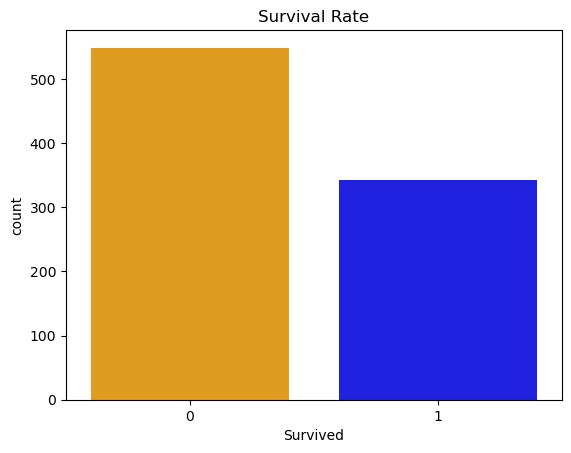

In [111]:
sns.countplot(x='Survived', data=df ,palette=['orange', 'blue'])
plt.title('Survival Rate')
plt.show()

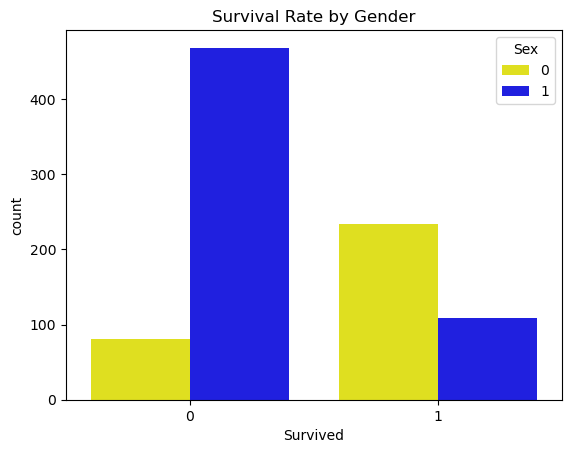

In [121]:
sns.countplot(x='Survived', hue='Sex', data=df,palette=['yellow', 'blue'])
plt.title('Survival Rate by Gender')
plt.show()

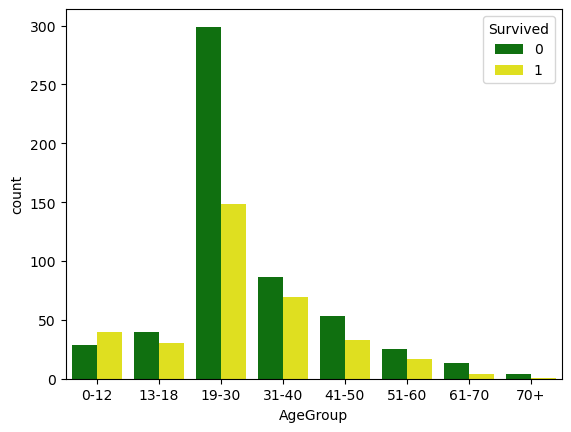

In [124]:
bins = [0, 12, 18, 30, 40, 50, 60, 70, np.inf]
labels = ['0-12', '13-18', '19-30', '31-40', '41-50', '51-60', '61-70', '70+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

sns.countplot(x='AgeGroup', hue='Survived', data=df,palette=['green', 'yellow'])
plt.show()

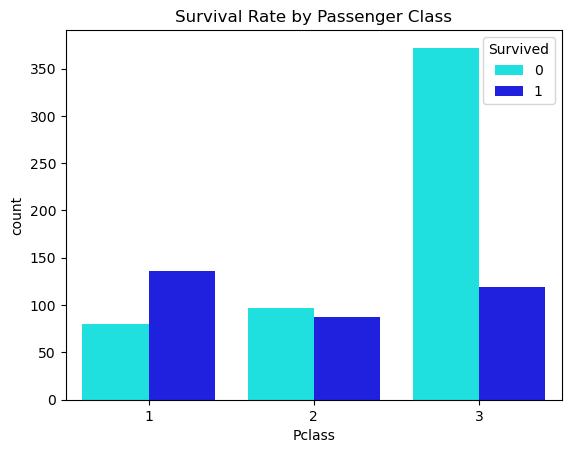

In [114]:
sns.countplot(x='Pclass', hue='Survived', data=df,palette=['aqua', 'blue'])
plt.title('Survival Rate by Passenger Class')
plt.show()

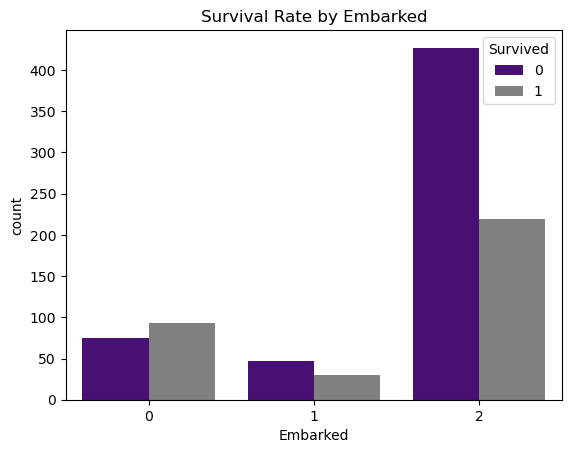

In [115]:
sns.countplot(x='Embarked', hue='Survived', data=df,palette=['indigo', 'grey'])
plt.title('Survival Rate by Embarked')
plt.show()

C:\Users\11shi\AppData\Local\Temp\ipykernel_20860\3588769282.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


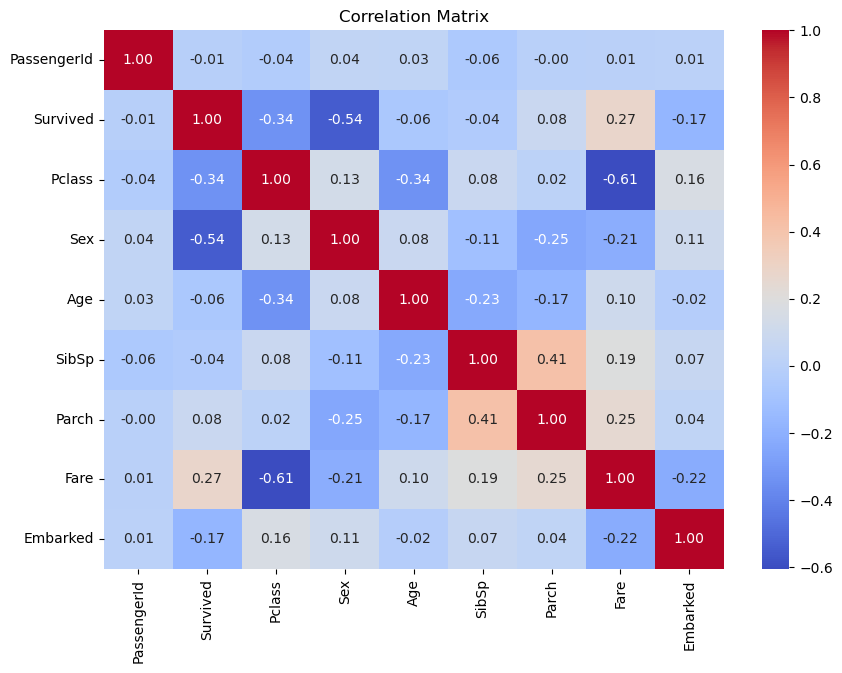

In [116]:
corr = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

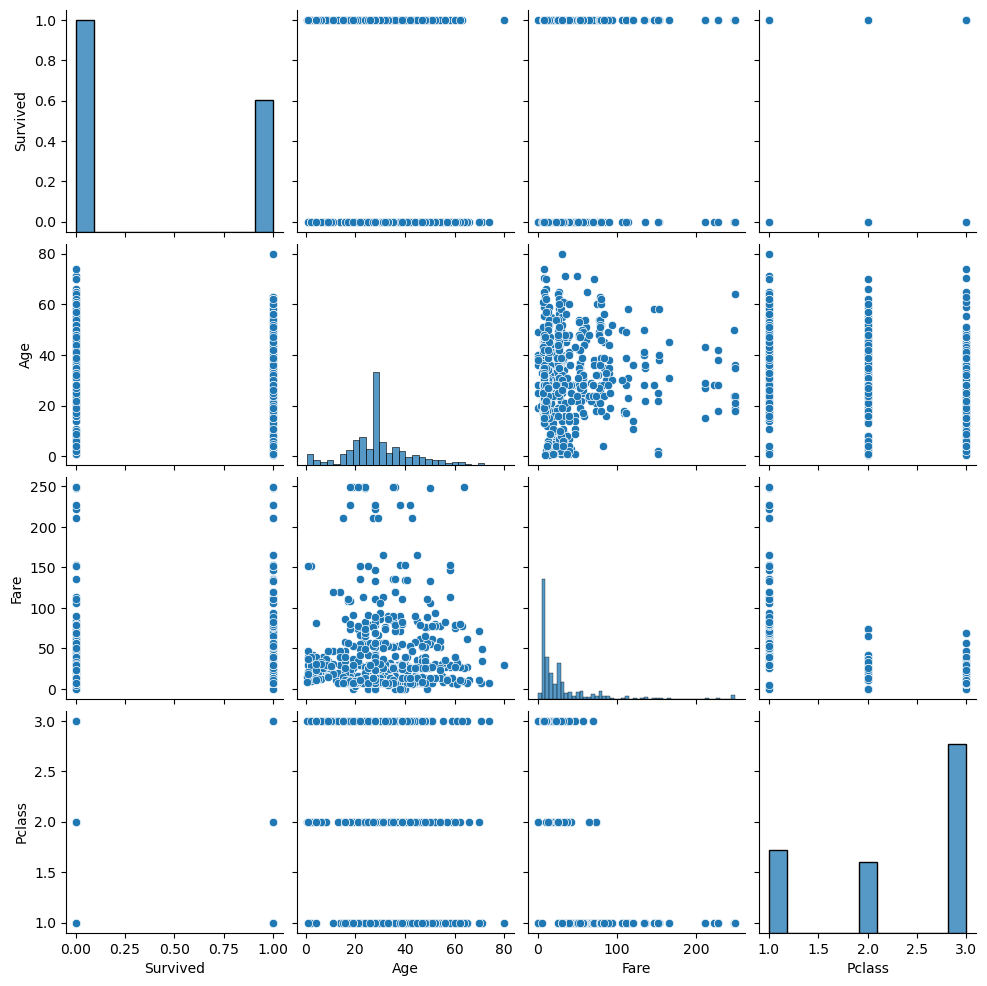

In [117]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']])
plt.show()

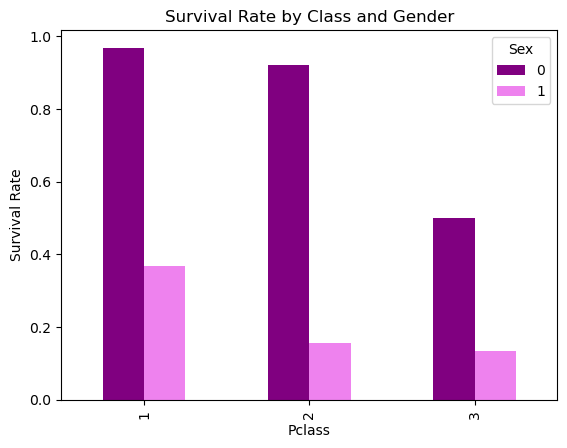

In [118]:
df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack().plot(kind='bar', stacked=False,color=['purple', 'violet'])
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Rate')
plt.show()

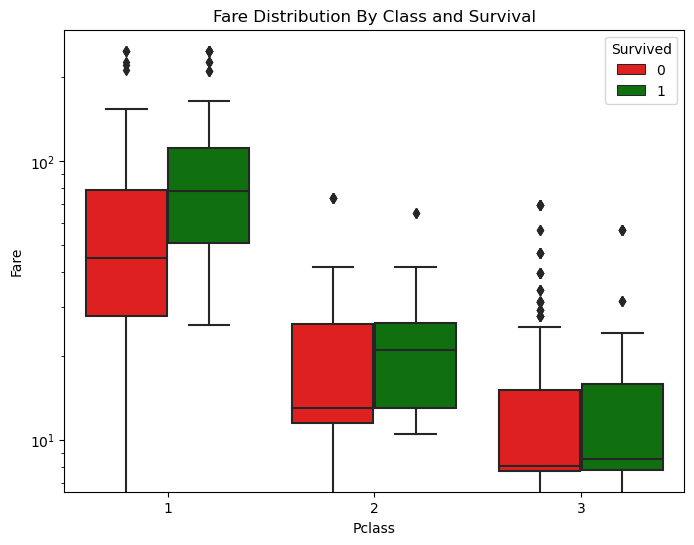

In [120]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass',y='Fare',hue='Survived',data=df,palette=['red', 'green'])
plt.title('Fare Distribution By Class and Survival')
plt.yscale('log')
plt.show()
